# Homework 09: Small Sample Hypothesis Testing, Simple Linear Regression
***

**Name**: Matthew Riopelle

***

This assignment is due on Canvas by **6:00PM on Friday November 11**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available in the Homework 01 assignment write-up on Canvas. To make life easier on the grader if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do $\color{red}{\text{Kernel}}$ $\color{red}\rightarrow$ $\color{red}{\text{Restart & Run All}}$ as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** $\color{red}{\text{write a summary of the results}}$ in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---

Here are some imports that you might find handy:

In [1]:
import numpy as np 
from scipy import stats
from scipy.stats import t
import pandas as pd
import matplotlib.pylab as plt 
%matplotlib inline

### Recall the general steps in hypothesis testing:

- Determine if the situation calls for a Z-test or a T-test.

- State the null hypothesis

- State the alternate hypothesis

- Set alpha

- collect data

- calculate a test statistic

- Construct acceptance/rejection regions

- Based on the test statistic and the acc./rej. regions, draw a conclusion about the null hypothesis.

# Problem 1
***

In this question you are a quality control engineer inspecting parts made at Cube Aerospace Manufacturing. You will need to decide whether or not to stop the manufacturing process to adjust the calibration of the machines making parts.

The part being inspected at work today is for aircraft. The part has a small port (hole) that must be tightly controlled with a 0.02 dm diameter otherwise catastrophic failure could result in fuel access (too much or too little) for the aircraft.

At various times the engineer takes a small sample of the components from the production line and measures the port diameter and possibly stops the assembly line to make adjustments to the machines if needed. 

At one of the these times four units are taken off the line and measured. The resulting port measurements (in dm) came in at:
$0.021, 0.019, 0.023, 0.020$.

Assuming the port diameters of interest are normally distributed, determine at the 1% level of significance, if there is sufficient evidence in the sample to conclude that processing stop since an adjustment is likely needed.


### Part A

***(2 points)*** Is this a Z-test or a T-test? Describe what you know about the test and its distribution.


Solution:

This is clearly a T-test. This is because NOT ONLY our sample size is really really small (n = 4), BUT we are also unaware of the population standard deviation. The t-test is a statistical one, which counts on a normal distribution, and approaches one as n approaches infinity. This graph will be more spread out than a standard normal distribution, and increasing the degrees of freedom will decrease the spread.

### Part B

***(2 points)*** What is the null hypothesis and what is the alternate hypothesis?

Solution:
The null hypothesis is that the mean hole is .02, the alternatate is that it does not eqal .02. It is a two-tailed distribution, because being far away from the mean on either side causes failure.

$H_0: \mu = .02$

$H_A: \mu \neq .02$

### Part C

***(3 points)*** Calculate the proper test statistic.

In [2]:
# Code your solution here:
data = np.array([.021, .019, .023, .02])
mean = data.mean()
size = 4
#DDOF = 1 because we want a sample deviation, NOT the population deviation
dev = data.std(ddof = 1)
t = (mean - .02)/ (dev/np.sqrt(size))
print("Our test statstic is: T = {}".format(t))

Our test statstic is: T = 0.8783100656536806


### Part D

***(3 points)*** What is/are the critical value(s)?

Solution:

At a 1% significance level, we have a = .01. Since it is a two tailed distribution, we use a/2 = .005 to account for both the left and right hand sides. 

Our critical values are: $-z_{\alpha / 2} = -5.84$ and $z_{\alpha /2} = 5.84$

In [3]:
# Code any needed work here:
a = .01
#two-tail probability means that we must divide our critical value by 2. DOF = 4-1 = 3
stats.t.ppf(1- (a/2), size - 1)


5.84090929975643

### Part E

***(2 points)*** What is the conclusion to our hypothesis test and what does it mean with respect to this problem?


Solution:

We have that our t-score (.878) is not outside of the critical values [-5.84, 5.84]

Therefore, we fail to reject our null hypothesis. There is not sufficient enough evidence to prove that $\mu \neq .02$

### Part F

***(3 points)*** Demonstrate how you would come to this same conclusion using the p-value approach.

Some documentation for `stats.ttest_1samp`: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html

and documentation for `t.cdf`:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

*Please demonstrate using both the methods.* 

In [4]:
# Code your solution here using stats.ttest_1samp
#data is the data we collected, .02 is the population mean, 
#alternate indicates a right, left, or two-tailed approach
stats.ttest_1samp(data, .02, alternative = 'two-sided')

Ttest_1sampResult(statistic=0.8783100656536807, pvalue=0.44443808513473027)

In [5]:
# Code your solution here using t.cdf()
#2 * here because of two tailed, and we arrive at a p-value similar to the one above
2 * stats.t.cdf(-t, size-1)

0.4444380851347304

$\textbf{Shown above, our p-value 0.444 > .01. Therefore, we fail to reject the null hypothesis.}$

Review the code below which graphs PDF curves and CDF curves and...

### Part G

***(2 points)*** ...fill in the requested questions/comments found in the code below.

*Please note : For full points, ensure that your commented answers are not obscured.*

*If your answer does not fit on one line, use multiple lines to give your answer.*

*You will be graded a 0 if it is not readable.*

0.8847080673775886

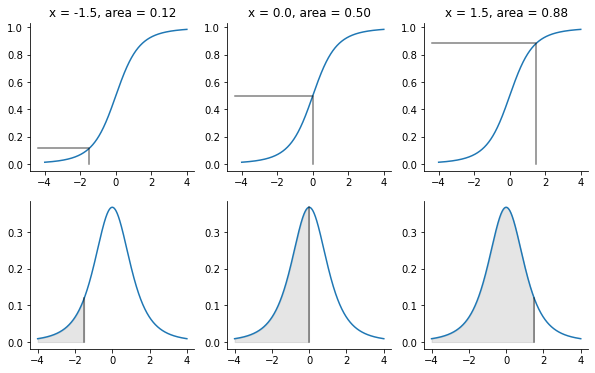

In [15]:
t_dist = stats.t(3)
# What does stats.t(3) mean?
# hint: https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.t.html
# ANSWER: This gives us the student t version for a continous random variable. 
# ANSWER: The three here give us 'shape of random variates'. 
# ANSWER: This is equivalent to 3 degree of freedom

t_values = np.linspace(-4, 4, 1000)
# What is contained in the variable 't_values'?
# ANSWER: this is representative of the possible t-values you could get, given 3 DOF.
# ANSWER: It essentially shows you the possible t-values you could get
# ANSWER: from -4 to 4 deviations from the mean

#####################################################

   # Set 1 of t-values.
#Lt = -5.84
#Mt = 0
#Ut = 5.84

   # Set 2 of t-values.
Lt = -1.5
Mt = 0
Ut = 1.5

# Try the following code with both sets of t-values above,
#   one set at a time.
# Of course you will need to comment one set out and 
#  un-comment the other set when you try each set.

example_values = (Lt, Mt, Ut)
pdf_values = t_dist.pdf(t_values)
cdf_values = t_dist.cdf(t_values)
fill_color = (0, 0, 0, 0.1)  # Light gray in RGBA format.
line_color = (0, 0, 0, 0.5)  # Medium gray in RGBA format.
fig, axes = plt.subplots(2, len(example_values), figsize=(10, 6))
for i, x in enumerate(example_values):
    cdf_ax, pdf_ax = axes[:, i]
    cdf_ax.plot(t_values, cdf_values)
    pdf_ax.plot(t_values, pdf_values)
    
    # Fill area at and to the left of x.
    pdf_ax.fill_between(t_values, pdf_values,
                        where=t_values <= x,
                        color=fill_color)
      
    # Probability density at this value.
    pd = t_dist.pdf(x) 
    
    # Line showing position of x on x-axis of PDF plot.
    pdf_ax.plot([x, x],
                [0, pd], color=line_color)
    
    # Cumulative distribution value for this x.
    cd = t_dist.cdf(x) 
    
    # Lines showing x and CDF value on CDF plot.
       # x position of y axis on plot.
    x_ax_min = cdf_ax.axis()[0]  
    cdf_ax.plot([x, x, x_ax_min],
                [0, cd, cd], color=line_color)
    cdf_ax.set_title('x = {:.1f}, area = {:.2f}'.format(x, cd))
    
    # Hide top and right axis lines and ticks to reduce clutter.
    for ax in (cdf_ax, pdf_ax):
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        
# Area of PDF at and to the left of 1.5
t_dist.cdf(Ut)


### Part H

***(2 points)*** What do these series of graphs represent?


Solution:

The graphs above represent the pdf's and cdf's for t-scores of -1.5, 0, and 1.5 respectively.
We can see above that the first column of graphs represents the t-score AT -1.5, and the bottom represents the probability that
t <= -1.5

Likewise: the second column has the t-value at 0, and the bottom picture shows the P(T <= 0)

Much the same: the third column's top picture has the v-value at 1.5, and the bottom picture shows P(T <= 1.5)

# Problem 2
***
Supply line issues have caused a boom in the sale of used cars. In this question you are advising a start-up called CU.com (Cars Used  .com). CU.com would like to know appropriate prices for used cars.

You decide to sample some local car dealerships and you find the following data:

Example:

| Cars Age    | Cars Price  | 
| :---        |    :----:   |
| (in years) | (in dollars) |
| 4 | 6300 |
| 4 | 5800 |
| 5 | 5700 |
| 5 | 4500 |
| 7 | 4500 |
| 7 | 4200 |
| 8 | 4100 |
| 9 | 3100 |
| 10 | 2100 |
| 11 | 2500 |
| 12 | 2200 |


### Part A

***(3 points)*** Make a scatter plot of this data to determine if there is a relationship between the cars age and the cars selling price.

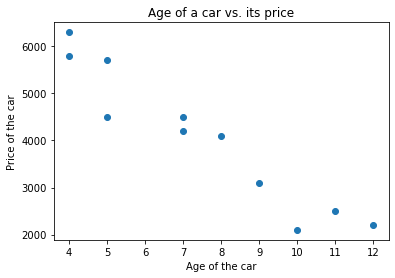

In [7]:
# Code your solution here:
#x values
x = np.array([4,4,5,5,7,7,8,9,10,11,12])
#y values
y = np.array([6300, 5800, 5700, 4500, 4500, 4200, 4100, 3100, 2100, 2500, 2200])
#plotting
plt.xlabel("Age of the car")
plt.ylabel("Price of the car")
plt.title("Age of a car vs. its price")
plt.scatter(x,y)

### Part B

***(2 points)*** After viewing the scatterplot, how would you describe the relationship?

Solution: 

It appears that the relationship is mostly linear, with a negative slope. Therefore, it appears that as a car gets older, it's price will decrease. The larger the age, the less the price

### Part C

***(2 points)*** Draw the same scatterplot as above, but this time add the line of best fit on top of the scatterplot.

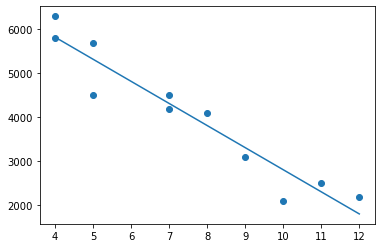

In [8]:
# Code your solution here:

a,b = np.polyfit(x,y,1)
plt.scatter(x,y)
xbar = x.mean()
ybar = y.mean()
#computing the numerator and denominator for the slope (b_1)
num = np.array((x - xbar)*(y - ybar)).sum()
den = np.array((x - xbar)**2).sum()
slope = num/den
#computing the y intercept (b_0)
yInt = ybar - slope * xbar
plt.plot(x, slope*x + yInt)

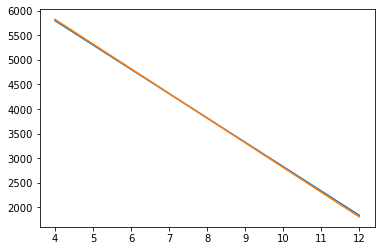

In [9]:
#HAND WRITTEN REGRESSION VS COMPUTER GENERATED
plt.plot(x, -494.95*x + 7779.29)
plt.plot(x, slope*x + yInt)

### Part D

***(4 points)*** What is the regression equation for this example? i.e. What is the line of best fit?

Use TeX to write the equation, with the appropriate values, in the cell below:

Solution: 

Defining:

$\bar{x} = \frac{4+4+5+5+7+7+8+9+10+11+12}{11} = 7.45$

$\bar{y} = \frac{6300 + 5800 + 5400 + 4500 + 4500 + 4200 + 4100 + 3100 + 2100 + 2500 + 2200}{11} = 4090.91$

$\bar{xy} = \frac{4 * 6300 + 4 * 5800 + 5 * 5400 + 5 * 4500 + 7 * 4500 + 7 * 4200 + 8 * 4100 + 9 * 3100 + 10 * 2100 + 11 * 2500 + 12 * 2200}{11} = 26900$

$\bar{x^2} = \frac{4^2 + 4^2 + 5^2 + 5^2 + 7^2 + 7^2 + 8^2 + 9^2 + 10^2 + 11^2 + 12^2}{11} = 62.73$

We will start with the slope:

$B_1 = \frac{\bar{xy} - \bar{x} \cdot \bar{y}}{\bar{x^2} - (\bar{x})^2} = \frac{26900 - (7.45 \cdot 4090.91)}{62.73 - (7.45)^2} = \frac{-3577.2795}{7.2275} \approx -494.95$

Now for the intercept:

$B_0 = \bar{Y} - B_1 \cdot \bar{x} = 4090.91 - (-494.95) \cdot (7.45) \approx 7779.29$

LINE OF BEST FIT:

$y = -494.95x + 7779.29$

$\textbf{While this is a rough estimate, I have plotted my hand written solution above with the other regression line,}$
$\textbf{and they are almost exactly the same!}$

### Part E

***(2 points)*** Interpret meaning of the regression line. What does $b_1$ (aka $\beta$ ) indicate relative to this problem?


Solution:

$\beta_1$ relates to the slope for the regression line. Instead of using y = mx + b, we are using $y = \beta_0 + \beta_1 \cdot x$. Therefore, $\beta_1$ indicates slope, and $\beta_0$ indicates the y intercept

# Problem 3
***
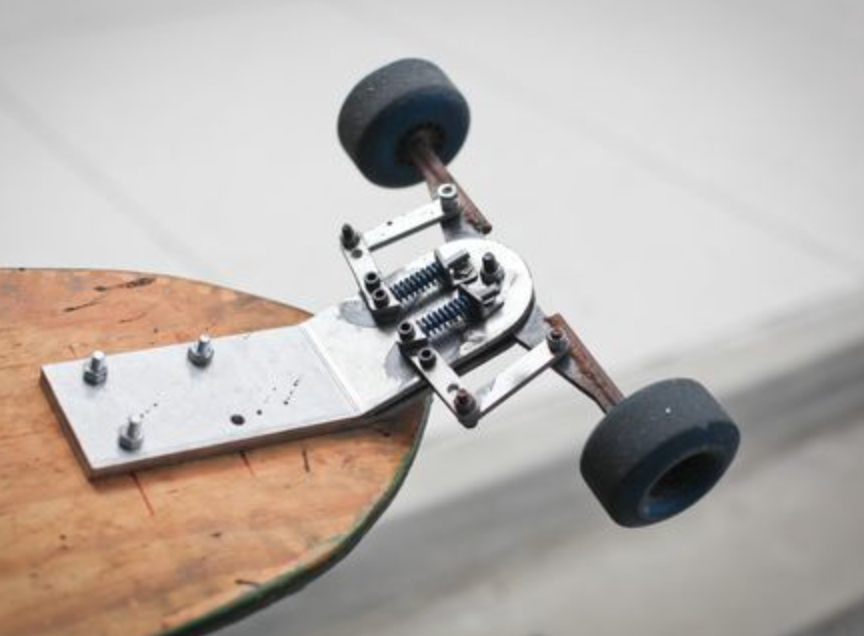

You have invented a new skateboard truck! You go on the TV show "Shark Tank" and Mark Cuban gives you funding for your venture.

In an attempt to market the truck properly you consider two experimental packaging designs; $\color{red}{\text{Design A}}$ and $\color{blue}{\text{Design B}}$. 

$\phantom{x}$

$\color{red}{\text{Design A}}$ is sent to 11 stores and their average sales the first month is 52 units with sample standard deviation 12 units.

$\color{blue}{\text{Design B}}$ is sent to 6 stores and their average sales the first month are 46 units with sample standard deviation 10 units.


### Part A

***(2 points)*** What is a point estimate for the difference in average sales between the two package designs and what does the point estimate mean?

Solution:

The point estimate is simply given by $\bar{x} - \bar{y} = 52 - 46 = 6$

This essentially means that given this data, we can expect Design A to store 6 more units than Design B (note this does not take into account standard deviation, nor the number of sample data)

But how accurate is this point estimate? We can answer this by creating a 95% confidence interval for the point estimate. Follow the steps below:

### Part B

***(3 points)*** What is the critical t-value?

Solution:

The critical t-value will is divided by 2 since we are trying to find the difference if there's a difference in the means

Therefore: $t_{\alpha/2} = 2.1314495$

$\textbf{The above value is 2 tailed, since later on we are asked to find if there's a difference in the true means.}$

I am confused as to what this is asking exact, but if we are simply considering the 95% confidence interval (ie. not comparing the differences, but looking at the RIGHT tail probability), we would have this as a critical t-value:

$t_{\alpha} = 1.75305$ for a right tail critical value.

$t_{-\alpha} = -1.75305$ for a left tail critical value.

In [10]:
# Code here if needed:
tcrit = stats.t.ppf(1-(.05/2), 11+6-2)
print(tcrit)
ninetyFiveCrit = stats.t.ppf(1- .05, 11+6-2)
print("({}) is the crit for right tail probability.".format(ninetyFiveCrit))

2.131449545559323
(1.7530503556925547) is the crit for right tail probability.


### Part C

***(3 points)*** What is the 95% confidence interval for the point estimate? Either calculate it by 'hand' in the code or look up documentation on `stats.t.interval()`


In [11]:
# Code solution here:
xbar = 52
xstd = 12
xnum = 11
ybar = 46
ystd = 10
ynum = 6
lower = (xbar - ybar) - (tcrit)*np.sqrt((((xstd)**2/xnum) + ((ystd)**2/ynum)))
upper = (xbar - ybar) + (tcrit)*np.sqrt((((xstd)**2/xnum) + ((ystd)**2/ynum)))
print("The 95% confidence interval is : [{},{}]".format(lower, upper))

The 95% confidence interval is : [-5.627164870160184,17.627164870160186]


### Part D

***(2 points)*** Interpret the CI in terms of this problem. Talk about how the average sales and actual sales are being affected in that interval.

Solution:

This means that if we were to take the differences of sample mean and standard deviation 100 times, we are confident that 95 of those times will include an interval that actually contains the true difference of mean. However, this doesn't really give us any information about what the true value may be. Seeing how massive this confidence interval is tho, it may be compelling to think that there's likely no difference in the companies

### Part E

Test at the 1% level of significance whether the data provide sufficient evidence to conclude that the mean sales per month of the two designs are different. Use the critical value approach.


***(2 points)*** List the null and alternate hypothesis.

Solution:

$H_0: \mu_1 - \mu_2 = 0$

$H_A: \mu_1 - \mu_2 \neq 0$

### Part F

***(2 points)*** What is the test statistic?

Solution:

t = 1.0998981

In [12]:
# Code here if needed:
t = ((xbar -ybar) - 0)/np.sqrt(((xstd)**2/xnum) + ((ystd)**2/ynum))
print(t)

1.0998981622920558


### Part G

***(2 points)*** What is the critical value?

Solution:


In [13]:
# Code solution here if needed:
#AT A 1% level of significance
tcrit = stats.t.ppf(1-(.01/2), 11+6-2)
print(tcrit)

2.946712883338615


### Part H

***(2 points)*** Does this confirm your null hypothesis? Support your answer with findings from your working for this problem.

Solution:

Since our crit value > our test statistic, we FAIL TO REJECT the null hypothesis. From our confidence interval above, we can see our test stat fits perfectly into it, meaning that interval was a correct interval. We have no evidence to claim that the companies sell ANY amount different of product